In [65]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark = SparkSession.builder.appName('ResponsiUTS').getOrCreate()

data = [('P001', 'Product A', 'Elektronics', 10, 200, '2022-01-10'),
        ('P002', 'Product B', 'Elektronics', 30, 150, '2022-02-11'),
        ('P003', 'Product C', 'Clothing', 20, 100, '2022-03-10'),
        ('P004', 'Product D', 'Clothing', 15, 120, '2022-02-12'),
        ('P005', 'Product E', 'Kitchen', 25, 90, '2022-04-13'),
        ('P005', 'Product E', 'Kitchen', 5, 300, '2022-01-14')]

columns = ['ProductID', 'ProductName', 'Category', 'Quantity', 'Price', 'Date']

df = spark.createDataFrame(data, schema=columns)
df.show()


+---------+-----------+-----------+--------+-----+----------+
|ProductID|ProductName|   Category|Quantity|Price|      Date|
+---------+-----------+-----------+--------+-----+----------+
|     P001|  Product A|Elektronics|      10|  200|2022-01-10|
|     P002|  Product B|Elektronics|      30|  150|2022-02-11|
|     P003|  Product C|   Clothing|      20|  100|2022-03-10|
|     P004|  Product D|   Clothing|      15|  120|2022-02-12|
|     P005|  Product E|    Kitchen|      25|   90|2022-04-13|
|     P005|  Product E|    Kitchen|       5|  300|2022-01-14|
+---------+-----------+-----------+--------+-----+----------+



In [40]:
df = df.withColumn('Pendapatan', df['Quantity'] * df['Price'])
df.show()

+---------+-----------+-----------+--------+-----+----------+----------+
|ProductID|ProductName|   Category|Quantity|Price|      Date|Pendapatan|
+---------+-----------+-----------+--------+-----+----------+----------+
|     P001|  Product A|Elektronics|      10|  200|2022-01-10|      2000|
|     P002|  Product B|Elektronics|      30|  150|2022-02-11|      4500|
|     P003|  Product C|   Clothing|      20|  100|2022-03-10|      2000|
|     P004|  Product D|   Clothing|      15|  120|2022-02-12|      1800|
|     P005|  Product E|    Kitchen|      25|   90|2022-04-13|      2250|
|     P005|  Product E|    Kitchen|       5|  300|2022-01-14|      1500|
+---------+-----------+-----------+--------+-----+----------+----------+



In [66]:
df = df.groupBy('Category').agg(F.max('Price').alias('PriceMax')).orderBy('PriceMax')
df.show()

+-----------+--------+
|   Category|PriceMax|
+-----------+--------+
|   Clothing|     120|
|Elektronics|     200|
|    Kitchen|     300|
+-----------+--------+



In [123]:
from pyspark.sql.window import Window

windowSpec = Window.partitionBy('Category').orderBy('Quantity')
df.withColumn('Rank', F.rank().over(windowSpec)).show()

+---------+-----------+-----------+--------+-----+----------+----+
|ProductID|ProductName|   Category|Quantity|Price|      Date|Rank|
+---------+-----------+-----------+--------+-----+----------+----+
|     P004|  Product D|   Clothing|      15|  120|2022-02-12|   1|
|     P003|  Product C|   Clothing|      20|  100|2022-03-10|   2|
|     P001|  Product A|Elektronics|      10|  200|2022-01-10|   1|
|     P002|  Product B|Elektronics|      30|  150|2022-02-11|   2|
|     P005|  Product E|    Kitchen|       5|  300|2022-01-14|   1|
|     P005|  Product E|    Kitchen|      25|   90|2022-04-13|   2|
+---------+-----------+-----------+--------+-----+----------+----+



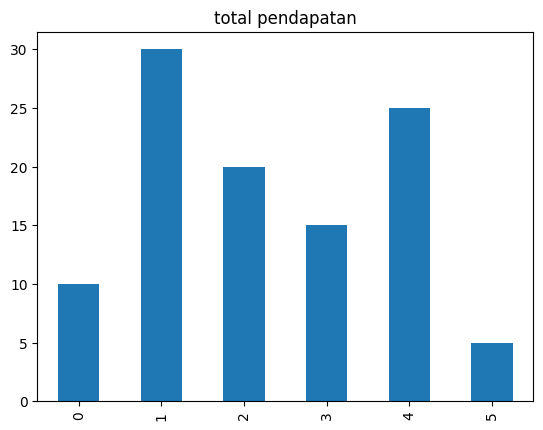

In [113]:
import matplotlib.pyplot as plt
df_pandas['Quantity'].plot(kind='bar')
plt.title('total pendapatan')
plt.show()

In [3]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=1ddcb7ffa835ef6b0f95cadf68f8e322aced5dfe6a72c992f9d81ae3e29705b7
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [47]:
pip install pandas

In [49]:
pip install matplotlib